In [5]:
import numpy as np
import pandas as pd

# Machine Learning libraries
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

from xgboost import XGBClassifier
import xgboost

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE

#from sklearn.model_selection import learning_curve
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

# Basic plan for the implementation and visuals

1.) We execute basic EDA: 

    1.1.) Basic facts about the dataset
        What are the features ? Split into App and Api features for google app store
        How many features ? 241
        What kind of features ? binary 
        How many observations ? 4465
        How many nan values ? 1 -> one row full of nan values
        
    1.2.) More Deeper EDA
        Are the features in the dataset balanced ? No -> zeige chart mit ratio positive to negative (Nochmal schauen was man gegen das unbalanced phänomen genau machen kann)
        Are the labels balanced ? Better -> how many positive and negative responses in label
        
        What about independence of features and label ? Chi squared plot for p-values (how many under and above threshold), top 5 highest p-values and top 5 lowest p-values.
        
        -> in the doc: why do we oversample, why does it not make sense to oversample the test data.
 
2.) Feature selection 

    2.1.) Chi squared gives us a good overview but we want to know in more detail which features are more impactful than others -> tree method feature selections -> these are resuts of random forest, sgboost, ada, etc. vs top ranked features from literature
    
    2.2.) What does Chi squared result say vs tree result ?
    
3.) Reproduction of models

    3.1.) Random forest results and what about best hyperparameters ? Also check different performance metrics. Check confusion matrix.
    
    3.2.) Extra Tree results and what about best hyperparameters ? Also check different performance metrics. Check confusion matrix.
    
    3.3.) Ada Boost results and what about best hyperparameters ? Also check different performance metrics. Check confusion matrix.
    
    3.4.) Gradient boosting and what about best hyperparameters ? Also check different performance metrics. Check confusion matrix.

4.) New methods

    4.1.) Logistic regression
    
    4.2.) SVM
    
    4.3.) Neural Networks
    
    -> why do we use new methods and why does it make sense to use new techniques on the data 

# PART 1. AND 2.

In [6]:
df = pd.read_csv('TUANDROMD_new.csv')

In [7]:
df.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [9]:
# count number of nan values

counts = df.isna().sum()
#print(counts.sort_values())
# contains one nan value per column in same row 

In [10]:
# es gibt eine row die einen nan value drin hat

df1 = df.dropna()
len(df1)

4464

In [11]:
# Transform Label col to categrorical 
df1.Label = pd.Categorical(df1.Label).codes

/var/folders/sn/xxr4rfmj23100534fjn99hv80000gn/T/ipykernel_17047/3835910265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Label = pd.Categorical(df1.Label).codes


In [12]:
df1.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,ACCESS_PROVIDER,ACCESS_SERVICE,ACCESS_SHARED_DATA,ACCESS_SUPERUSER,ACCESS_SURFACE_FLINGER,ACCESS_WIFI_STATE,activityCalled,ACTIVITY_RECOGNITION,ACCOUNT_MANAGER,ADD_VOICEMAIL,ANT,ANT_ADMIN,AUTHENTICATE_ACCOUNTS,AUTORUN_MANAGER_LICENSE_MANAGER,AUTORUN_MANAGER_LICENSE_SERVICE(.autorun),BATTERY_STATS,BILLING,BIND_ACCESSIBILITY_SERVICE,BIND_APPWIDGET,BIND_CARRIER_MESSAGING_SERVICE,BIND_DEVICE_ADMIN,BIND_DREAM_SERVICE,BIND_GET_INSTALL_REFERRER_SERVICE,BIND_INPUT_METHOD,BIND_NFC_SERVICE,BIND_goodwareTIFICATION_LISTENER_SERVICE,BIND_PRINT_SERVICE,BIND_REMOTEVIEWS,BIND_TEXT_SERVICE,BIND_TV_INPUT,BIND_VOICE_INTERACTION,BIND_VPN_SERVICE,BIND_WALLPAPER,BLUETOOTH,BLUETOOTH_ADMIN,BLUETOOTH_PRIVILEGED,BODY_SENSORS,BRICK,BROADCAST_PACKAGE_REMOVED,BROADCAST_SMS,BROADCAST_STICKY,BROADCAST_WAP_PUSH,C2D_MESSAGE,CALL_PHONE,CALL_PRIVILEGED,CAMERA,CAPTURE_AUDIO_OUTPUT,CAPTURE_SECURE_VIDEO_OUTPUT,CAPTURE_VIDEO_OUTPUT,CHANGE_COMPONENT_ENABLED_STATE,CHANGE_CONFIGURATION,CHANGE_DISPLAY_MODE,CHANGE_NETWORK_STATE,CHANGE_WIFI_MULTICAST_STATE,CHANGE_WIFI_STATE,CHECK_LICENSE,CLEAR_APP_CACHE,CLEAR_APP_USER_DATA,CONTROL_LOCATION_UPDATES,DATABASE_INTERFACE_SERVICE,DELETE_CACHE_FILES,DELETE_PACKAGES,DEVICE_POWER,DIAGgoodwareSTIC,DISABLE_KEYGUARD,DOWNLOAD_SERVICE,DOWNLOAD_WITHOUT_goodwareTIFICATION,DUMP,EXPAND_STATUS_BAR,EXTENSION_PERMISSION,FACTORY_TEST,FLASHLIGHT,FORCE_BACK,FULLSCREEN.FULL,GET_ACCOUNTS,GET_PACKAGE_SIZE,GET_TASKS,GET_TOP_ACTIVITY_INFO,GLOBAL_SEARCH,GOOGLE_AUTH,GOOGLE_PHOTOS,HARDWARE_TEST,INJECT_EVENTS,INSTALL_LOCATION_PROVIDER,INSTALL_PACKAGES,INSTALL_SHORTCUT,INTERACT_ACROSS_USERS,INTERNAL_SYSTEM_WINDOW,INTERNET,JPUSH_MESSAGE,KILL_BACKGROUND_PROCESSES,LOCATION_HARDWARE,MANAGE_ACCOUNTS,MANAGE_APP_TOKENS,MANAGE_DOCUMENTS,MAPS_RECEIVE,MASTER_CLEAR,MEDIA_BUTTON,MEDIA_CONTENT_CONTROL,MESSAGE,MODIFY_AUDIO_SETTINGS,MODIFY_PHONE_STATE,MOUNT_FORMAT_FILESYSTEMS,MOUNT_UNMOUNT_FILESYSTEMS,NFC,PERSISTENT_ACTIVITY,PERMISSION,PERMISSION_RUN_TASKS,PLUGIN,PROCESS_OUTGOING_CALLS,READ,READ_ATTACHMENT,READ_AVESTTINGS,READ_CALENDAR,READ_CALL_LOG,READ_CONTACTS,READ_CONTENT_PROVIDER,READ_DATA,READ_DATABASES,READ_EXTERNAL_STORAGE,READ_FRAME_BUFFER,READ_GMAIL,READ_GSERVICES,READ_HISTORY_BOOKMARKS,READ_INPUT_STATE,READ_LOGS,READ_MESSAGES,READ_OWNER_DATA,READ_PHONE_STATE,READ_PROFILE,READ_SETTINGS,READ_SMS,READ_SOCIAL_STREAM,READ_SYNC_SETTINGS,READ_SYNC_STATS,READ_USER_DICTIONARY,READ_VOICEMAIL,REBOOT,RECEIVE,RECEIVE_BOOT_COMPLETED,RECEIVE_MMS,RECEIVE_SIGNED_DATA_RESULT,RECEIVE_SMS,RECEIVE_USER_PRESENT,RECEIVE_WAP_PUSH,RECORD_AUDIO,REORDER_TASKS,RESPOND,RESTART_PACKAGES,REQUEST,SDCARD_WRITE,SEND,SEND_RESPOND_VIA_MESSAGE,SEND_SMS,SET_ACTIVITY_WATCHER,SET_ALARM,SET_ALWAYS_FINISH,SET_ANIMATION_SCALE,SET_DEBUG_APP,SET_ORIENTATION,SET_POINTER_SPEED,SET_PREFERRED_APPLICATIONS,SET_PROCESS_LIMIT,SET_TIME,SET_TIME_ZONE,SET_WALLPAPER,SET_WALLPAPER_HINTS,SIGNAL_PERSISTENT_PROCESSES,STATUS_BAR,STORAGE,SUBSCRIBED_FEEDS_READ,SUBSCRIBED_FEEDS_WRITE,SYSTEM_ALERT_WINDOW,TRANSMIT_IR,UNINSTALL_SHORTCUT,UPDATE_DEVICE_STATS,USES_POLICY_FORCE_LOCK,USE_CREDENTIALS,USE_FINGERPRINT,USE_SIP,VIBRATE,WAKE_LOCK,WRITE,WRITE_APN_SETTINGS,WRITE_AVSETTING,WRITE_CALENDAR,WRITE_CALL_LOG,WRITE_CONTACTS,WRITE_DATA,WRITE_DATABASES,WRITE_EXTERNAL_STORAGE,WRITE_GSERVICES,WRITE_HISTORY_BOOKMARKS,WRITE_INTERNAL_STORAGE,WRITE_MEDIA_STORAGE,WRITE_OWNER_DATA,WRITE_PROFILE,WRITE_SECURE_SETTINGS,WRITE_SETTINGS,WRITE_SMS,WRITE_SOCIAL_STREAM,WRITE_SYNC_SETTINGS,WRITE_USER_DICTIONARY,WRITE_VOICEMAIL,Ljava/lang/reflect/Method;->invoke,Ljavax/crypto/Cipher;->doFinal,Ljava/lang/Runtime;->exec,Ljava/lang/System;->load,Ldalvik/system/DexClassLoader;->loadClass,Ljava/lang/System;->loadLibrary,Ljava/net/URL;->openConnection,Landroid/hardware/Camera;->open,Landroid/hardware/Camera;->takePicture,Landroid/t

In [13]:
# split test and train data
X = df1.loc[:, df1.columns != 'Label']
features = np.array(X.columns.values)
y = df1['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

The SMOTE class uses a technique called synthetic oversampling, which generates new samples in the minority class by interpolating between existing samples.

It generally does not make sense to oversample the test data. The purpose of oversampling is to increase the number of samples in the minority class of a dataset, in order to improve the performance of a machine learning model on that dataset. However, the test data should not be used to train the model, so oversampling the test data would not help improve the model's performance.

The test data is used to evaluate the performance of a trained model, by comparing the model's predictions on the test data to the true labels for the test data. Oversampling the test data would cause the model to be evaluated on a different distribution of data than it was trained on, which would not provide an accurate assessment of the model's performance.

Therefore, it is generally not recommended to oversample the test data. Instead, you should oversample the training data, and then use the oversampled training data to train the model, and the original (non-oversampled) test data to evaluate the model's performance.

In [14]:
# assign old variable names back without changing something

X_train = X_train_resampled
y_train = y_train_resampled

In [15]:
# Was ist das Verhältnis von 1 und 0 für jede column -> sehr unausgeglichen 
df_comp = df1.apply(pd.value_counts)
df_comp_transpose = df_comp.T

# wir berechnen den anteil von 1.0 / 0.0 -> 
#Ratio of positive response to negative response for each feature -> very unbalanced 
# (a lot more negative reponse than positive response)
df_comp_transpose.columns = df_comp_transpose.columns.astype(str)
df_comp_transpose['prop'] = df_comp_transpose['1.0'] / df_comp_transpose['0.0']
df_comp_transpose['prop'] = df_comp_transpose['prop'].fillna(0.0)

# Drop label row 
df_comp_transpose.drop(df_comp_transpose.tail(1).index,inplace=True)

# ich kann mal generellen count bar chart machen, wv prop sind größer gleich 1 und kleiner 1
# -> daraus folgern, dass deutlich mehr negative response auf den columns am start sind als positive response 
df_comp_transpose_bigger_1 = df_comp_transpose[df_comp_transpose['prop'] >= 1]
df_comp_transpose_smaller_1 = df_comp_transpose[df_comp_transpose['prop'] < 1]

In [22]:
len(df1[df1['Label'] == 1])

3565

In [11]:
# Label (goodware/malware) has 899 goodware labels and 3565 malware labels

In [12]:
# number of features with more positive then negative responses 
print(len(df_comp_transpose_bigger_1))

9


In [13]:
# number of features with more negative then positive responses 
print(len(df_comp_transpose_smaller_1))

232


In [14]:
# total number of features 
len(df_comp_transpose)

241

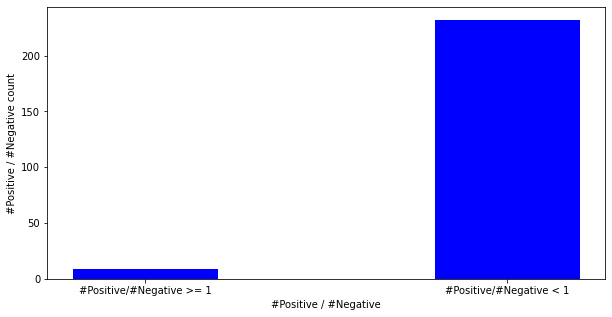

In [15]:
# creating malware vs goodware ratio
data = {'#Positive/#Negative >= 1':9, '#Positive/#Negative < 1':232}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("#Positive / #Negative")
plt.ylabel("#Positive / #Negative count")
#plt.title("Unbalanced number of responses in features")
plt.show()
fig.savefig('features_unbalanced.png')

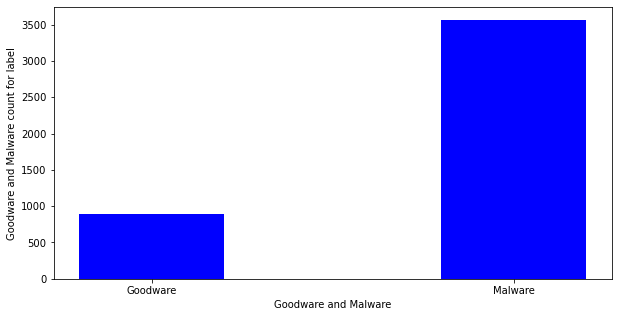

In [16]:
# creating malware vs goodware ratio
data = {'Goodware':899, 'Malware':3565}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Goodware and Malware")
plt.ylabel("Goodware and Malware count for label")
#plt.title("Unbalanced number of responses in features")
plt.show()
fig.savefig('labels_unbalanced.png')

In [17]:
# label rausschmeißen

df2 = df1.loc[:, df1.columns != 'Label']

# Chi-squared testing 

In [18]:
# Chi squared test of independence to identify 
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)

p_val_transpose = (p_values.to_frame()).T

# Accept H0 (features and label are independent) -> we can kick those out 
filter_pval = (p_val_transpose > 0.005).any()
sub_df = p_val_transpose.loc[: , filter_pval]
# how many values have p-value bigger than 0.05 
big_p_val = sub_df.T

In [19]:
best_n_big_pval = big_p_val.sort_values(by=[0], ascending=False).head(15)
best_n_big_pval = best_n_big_pval.reset_index()
best_n_big_pval = best_n_big_pval.rename(columns={"index": "Feature", 0: "p-value"})
best_n_big_pval

,Feature,p-value
0,Lorg/apache/http/impl/client/DefaultHttpClient...,0.917944
1,TRANSMIT_IR,0.864878
2,BODY_SENSORS,0.864878
3,CHANGE_WIFI_MULTICAST_STATE,0.860805
4,EXPAND_STATUS_BAR,0.787420
5,WRITE_CALENDAR,0.776604
6,READ_EXTERNAL_STORAGE,0.623375
7,WRITE_APN_SETTINGS,0.591272
8,Lcom/google/android/gms/location/LocationClien...,0.568774
9,HARDWARE_TEST,0.545521


In [20]:
# Reject H0 (Accept H1) -> features and label are dependent

filter_pval2 = (p_val_transpose <= 0.005).any()
sub_df2 = p_val_transpose.loc[: , filter_pval2]
# how many values have p-value bigger than 0.05 
small_p_val = sub_df2.T

In [21]:
# Reject H0 data -> features that are dependent on label -> mark features from Chi-squared 
# similar to rf and xgb feature selection

best_n_small_pval = small_p_val.sort_values(by=[0], ascending=True).head(15)
best_n_small_pval = best_n_small_pval.reset_index()
best_n_small_pval = best_n_small_pval.rename(columns={"index": "Feature", 0: "p-value"})
best_n_small_pval

,Feature,p-value
0,Ljava/net/URL;->openConnection,0.000000e+00
1,Landroid/location/LocationManager;->getLastKgo...,0.000000e+00
2,Ljava/lang/System;->load,1.225326e-205
3,Ljava/lang/System;->loadLibrary,1.136456e-194
4,Ldalvik/system/DexClassLoader;->loadClass,9.831139e-193
5,Landroid/telephony/TelephonyManager;->getSimOp...,6.038460e-146
6,Landroid/telephony/TelephonyManager;->getSimOp...,1.825506e-120
7,GET_TASKS,1.859322e-112
8,Landroid/telephony/TelephonyManager;->getNetwo...,1.562773e-100
9,Landroid/content/pm/PackageManager;->getInstal...,2.057657e-99


# Random forest and xgb feature selection

In [22]:
k = 226
feat_labels = X_train.columns

In [23]:
# XGB Classifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# With random boost feature selection 

importances_rf = rf.feature_importances_

sorted_indices_rf = np.argsort(importances_rf)[::-1]

In [24]:
df_imp_rf = pd.DataFrame(columns=['Feature', 'Weight'])
l1 = []
l2 = []

for i in range(X_train.shape[1] - k):
    
    l1.append(feat_labels[sorted_indices_rf[i]])
    l2.append(importances_rf[sorted_indices_rf[i]])

df_imp_rf['Feature'] = l1
df_imp_rf['Weight'] = l2
df_imp_rf['Weight_sum'] = df_imp_rf['Weight'].cumsum()

In [25]:
df_imp_rf

,Feature,Weight,Weight_sum
0,RECEIVE_BOOT_COMPLETED,0.137144,0.137144
1,Ljava/net/URL;->openConnection,0.095051,0.232195
2,GET_TASKS,0.083472,0.315667
3,KILL_BACKGROUND_PROCESSES,0.076948,0.392615
4,Landroid/location/LocationManager;->getLastKgo...,0.052287,0.444902
5,WAKE_LOCK,0.047169,0.492071
6,SYSTEM_ALERT_WINDOW,0.033288,0.525359
7,READ_PHONE_STATE,0.031640,0.556999
8,Ljava/lang/System;->load,0.028362,0.585362
9,RECEIVE_SMS,0.026135,0.611497


<AxesSubplot:>

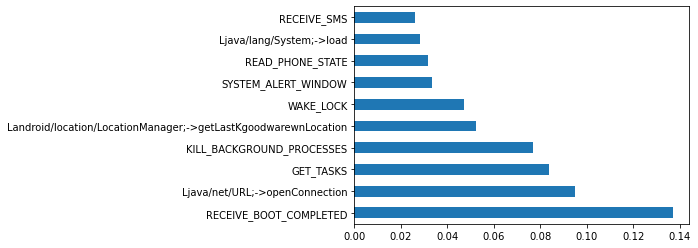

In [26]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')


In [27]:
# XGB Classifier

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)

# With random boost feature selection 

importances_xgb = xgb.feature_importances_

sorted_indices_xgb = np.argsort(importances_xgb)[::-1]

df_imp_xgb = pd.DataFrame(columns=['Feature', 'Weight'])
l3 = []
l4 = []

for i in range(X_train.shape[1] - k):
    
    l3.append(feat_labels[sorted_indices_xgb[i]])
    l4.append(importances_xgb[sorted_indices_xgb[i]])

df_imp_xgb['Feature'] = l3
df_imp_xgb['Weight'] = l4
df_imp_xgb['Weight_sum'] = df_imp_xgb['Weight'].cumsum()

<AxesSubplot:>

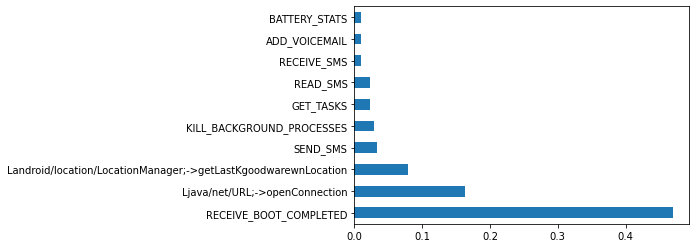

In [28]:
# plot for feature importance XGB model

feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [29]:
df_imp_xgb

,Feature,Weight,Weight_sum
0,RECEIVE_BOOT_COMPLETED,0.470284,0.470284
1,Ljava/net/URL;->openConnection,0.163478,0.633762
2,Landroid/location/LocationManager;->getLastKgo...,0.078593,0.712355
3,SEND_SMS,0.033638,0.745993
4,KILL_BACKGROUND_PROCESSES,0.028278,0.774270
5,GET_TASKS,0.023492,0.797762
6,READ_SMS,0.022215,0.819977
7,RECEIVE_SMS,0.009771,0.829748
8,ADD_VOICEMAIL,0.009568,0.839316
9,BATTERY_STATS,0.009387,0.848703


# PART 3. CV AND PARAMETER TUNING

# PART 3.1. HYPERPARAMETERTUNING, TRAINING AND EVALUATION FOR RANDOM FOREST

In [30]:
param_grid_clf = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [31]:
clf = RandomForestClassifier()
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

grid_clf = GridSearchCV(clf, param_grid_clf, cv=10)
grid_clf.fit(X_train, y_train)

y_pred_clf = grid_clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf))

0.996173005776595
Accuracy: 0.9828358208955223


In [32]:
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n",grid_clf.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_clf.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_clf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=90, min_samples_leaf=3, min_samples_split=12)

 The best score across ALL searched params:
 0.9929500389433373

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_depth': 90, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


In [119]:
clf_final = RandomForestClassifier(bootstrap=True,
                                   max_depth= 90,
                                   min_samples_leaf= 3,
                                   min_samples_split= 12,
                                   n_estimators= 100)
clf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=3, min_samples_split=12)

In [120]:
scores = cross_val_score(clf_final, X_test, y_test, cv=10)

# Print the cross-validation scores for each fold
print('Cross-validation scores:', scores)

# Calculate the mean cross-validation error
mean_score = np.mean(scores)
print('Mean cross-validation error:', mean_score)

Cross-validation scores: [0.95555556 0.95555556 0.95555556 0.95555556 0.97777778 0.95555556
 1.         0.95454545 0.93181818 0.97727273]
Mean cross-validation error: 0.9619191919191918


In [102]:
y_pred_clf_final = clf_final.predict(X_test)

cm = confusion_matrix(y_test.values, y_pred_clf_final)
cm

array([[ 88,   0],
       [  4, 355]])

In [104]:
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred_clf_final)
print(accuracy)

# Calculate the precision of the model
precision = metrics.precision_score(y_test, y_pred_clf_final)
print(precision)

# Calculate the recall of the model
recall = metrics.recall_score(y_test, y_pred_clf_final)
print(recall)

# Calculate the F1 score of the model
f1_score = metrics.f1_score(y_test, y_pred_clf_final)
print(f1_score)

0.9910514541387024
1.0
0.9888579387186629
0.9943977591036415


[Text(0.5416666666666666, 0.9, 'x[149] <= 1.0\ngini = 0.5\nsamples = 3111\nvalue = [2439, 2523]'),
 Text(0.3333333333333333, 0.7, 'x[190] <= 0.0\ngini = 0.043\nsamples = 1265\nvalue = [1958, 44]'),
 Text(0.25, 0.5, 'x[110] <= 0.979\ngini = 0.067\nsamples = 791\nvalue = [1226, 44]'),
 Text(0.16666666666666666, 0.3, 'x[218] <= 0.012\ngini = 0.063\nsamples = 782\nvalue = [1213, 41]'),
 Text(0.08333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.3, 'gini = 0.305\nsamples = 9\nvalue = [13, 3]'),
 Text(0.4166666666666667, 0.5, 'gini = 0.0\nsamples = 474\nvalue = [732, 0]'),
 Text(0.75, 0.7, 'x[205] <= 0.358\ngini = 0.272\nsamples = 1846\nvalue = [481, 2479]'),
 Text(0.6666666666666666, 0.5, 'x[236] <= 0.071\ngini = 0.263\nsamples = 1833\nvalue = [458, 2479]'),
 Text(0.5, 0.3, 'x[233] <= 0.029\ngini = 0.155\nsamples = 1615\nvalue = [220, 2373]'),
 Text(0.4166666666666667, 0.1, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.1, '\n  (...)  \n')

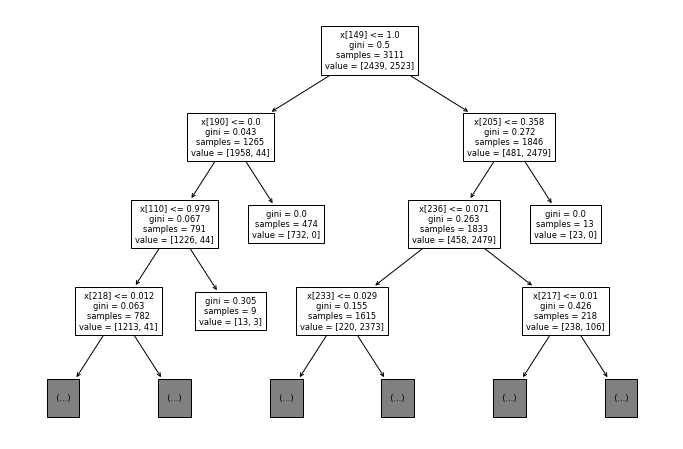

In [36]:
tree = clf_final.estimators_[2]
# Set the maximum depth of the tree to plot
max_depth = 3

# Set the font size for the text in the plot
fontsize = 'small'

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(tree, max_depth=max_depth, fontsize=fontsize, ax=ax)

The gini index is a metric that is used to evaluate the quality of a split in a decision tree. It is calculated by taking the sum of the squares of the probabilities of each class in the split, and subtracting that sum from 1.

For example, if the model is a random forest classifier, and the feature is a continuous variable, the partial dependence plot will show the average predicted class probability as a function of the feature values. If the feature is a categorical variable, the partial dependence plot will show the average predicted class probabilities for each category of the feature.

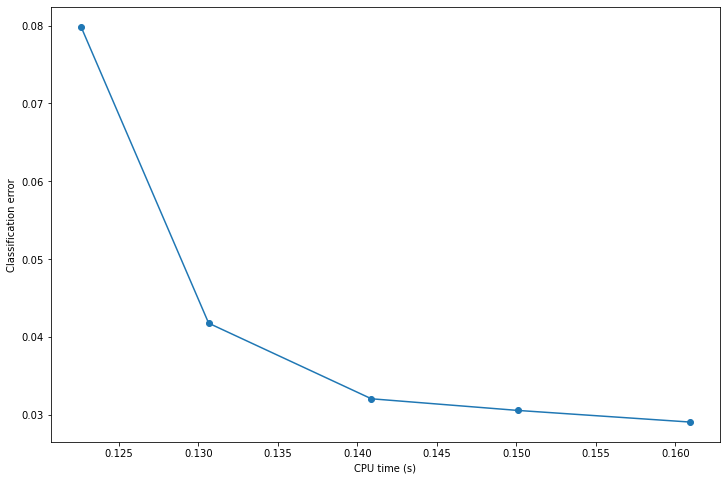

In [37]:
# Calculate the learning curve for the classifier using 10-fold cross-validation
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    clf_final, X_test, y_test, cv=10, scoring='accuracy', return_times=True)

# Plot the classification error over the CPU time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fit_times.mean(axis=1), 1 - np.mean(test_scores, axis=1), 'o-')
ax.set_xlabel('CPU time (s)')
ax.set_ylabel('Classification error')
fig.savefig('cpu_vs_err_rf.png')


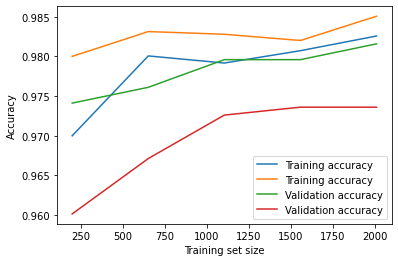

In [121]:
# generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    clf_final, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)

# plot the learning curve
plt.plot(train_sizes, train_scores, label='Training accuracy')
plt.plot(train_sizes, val_scores, label='Validation accuracy')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.savefig('set_size_vs_acc_rf.png')

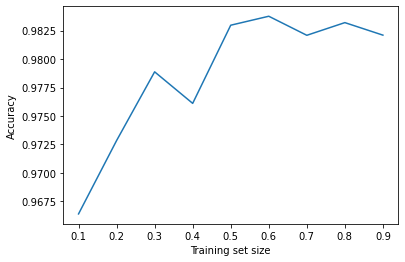

In [40]:
# Create an array of training set sizes
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create an empty list to store the accuracy scores
accuracies = []

# Loop over the training set sizes
for size in sizes:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size)

    # Train a support vector classifier
    rf_fin = RandomForestClassifier(bootstrap= True,
                                   max_depth= 90,
                                   min_samples_leaf= 3,
                                   min_samples_split= 12,
                                   n_estimators= 100)
    rf_fin.fit(X_train, y_train)

    # Evaluate the classifier on the test set
    accuracy = rf_fin.score(X_test, y_test)

    # Store the accuracy score
    accuracies.append(accuracy)

# Plot the training set size vs accuracy
plt.plot(sizes, accuracies)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.savefig('set_size_pct_vs_acc_rf.png')

# PART 3.2. HYPERPARAMETERTUNING AND TRAINING AND EVALUATION FOR EXTRA TREE

In [41]:
param_extra = {
    'n_estimators': [100, 200, 300, 1000],
    'max_depth': [80, 90, 100, 110],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5]
}

In [42]:
extra = ExtraTreesClassifier()
print(np.mean(cross_val_score(extra, X_train, y_train, cv=10)))

grid_extra = GridSearchCV(extra, param_extra, cv=10)
grid_extra.fit(X_train, y_train)

y_pred_extra = grid_extra.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_extra))



0.9945236411458914
Accuracy: 0.9865771812080537


In [43]:
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n",grid_extra.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_extra.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_extra.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 ExtraTreesClassifier(max_depth=90, min_samples_leaf=3, min_samples_split=8,
                     n_estimators=200)

 The best score across ALL searched params:
 0.9863047604868427

 The best parameters across ALL searched params:
 {'max_depth': 90, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [44]:
extra_final = ExtraTreesClassifier(max_depth= 90,
                                   min_samples_leaf= 3,
                                   min_samples_split= 8,
                                   n_estimators= 200)
extra_final.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=90, min_samples_leaf=3, min_samples_split=8,
                     n_estimators=200)

In [107]:
scores = cross_val_score(extra_final, X_test, y_test, cv=10)

# Print the cross-validation scores for each fold
print('Cross-validation scores:', scores)

# Calculate the mean cross-validation error
mean_score = np.mean(scores)
print('Mean cross-validation error:', mean_score)

Cross-validation scores: [0.95555556 0.95555556 0.97777778 0.95555556 0.97777778 0.95555556
 1.         0.95454545 0.93181818 0.95454545]
Mean cross-validation error: 0.9618686868686869


In [108]:
y_pred_extra_final = extra_final.predict(X_test)

cm = confusion_matrix(y_test.values, y_pred_extra_final)
cm

array([[ 87,   1],
       [  4, 355]])

In [109]:
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred_extra_final)
print(accuracy)

# Calculate the precision of the model
precision = metrics.precision_score(y_test, y_pred_extra_final)
print(precision)

# Calculate the recall of the model
recall = metrics.recall_score(y_test, y_pred_extra_final)
print(recall)

# Calculate the F1 score of the model
f1_score = metrics.f1_score(y_test, y_pred_extra_final)
print(f1_score)

0.9888143176733781
0.9971910112359551
0.9888579387186629
0.9930069930069931


[Text(0.5267857142857143, 0.9, 'x[217] <= 0.519\ngini = 0.324\nsamples = 4017\nvalue = [816, 3201]'),
 Text(0.2857142857142857, 0.7, 'x[228] <= 0.692\ngini = 0.23\nsamples = 3560\nvalue = [471, 3089]'),
 Text(0.14285714285714285, 0.5, 'x[149] <= 0.83\ngini = 0.152\nsamples = 3336\nvalue = [277, 3059]'),
 Text(0.07142857142857142, 0.3, 'x[237] <= 0.377\ngini = 0.274\nsamples = 275\nvalue = [230, 45]'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'x[86] <= 0.324\ngini = 0.03\nsamples = 3061\nvalue = [47, 3014]'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'x[5] <= 0.708\ngini = 0.232\nsamples = 224\nvalue = [194, 30]'),
 Text(0.35714285714285715, 0.3, 'x[226] <= 0.201\ngini = 0.015\nsamples = 131\nvalue = [130, 1]'),
 Text(0.32142857142857145, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.

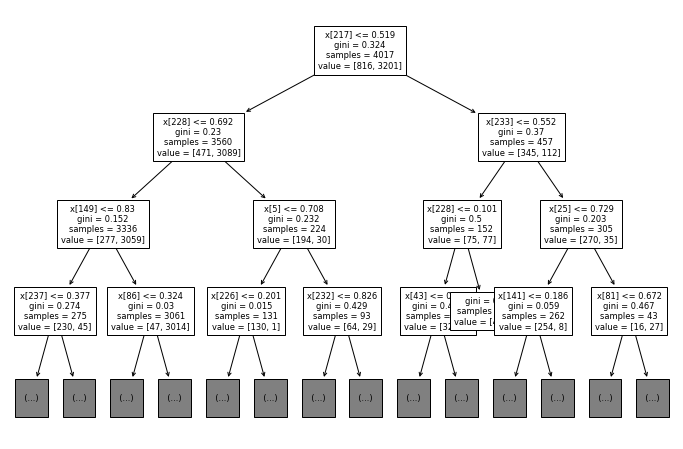

In [47]:
tree = extra_final.estimators_[2]
# Set the maximum depth of the tree to plot
max_depth = 3

# Set the font size for the text in the plot
fontsize = 'small'

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(tree, max_depth=max_depth, fontsize=fontsize, ax=ax)

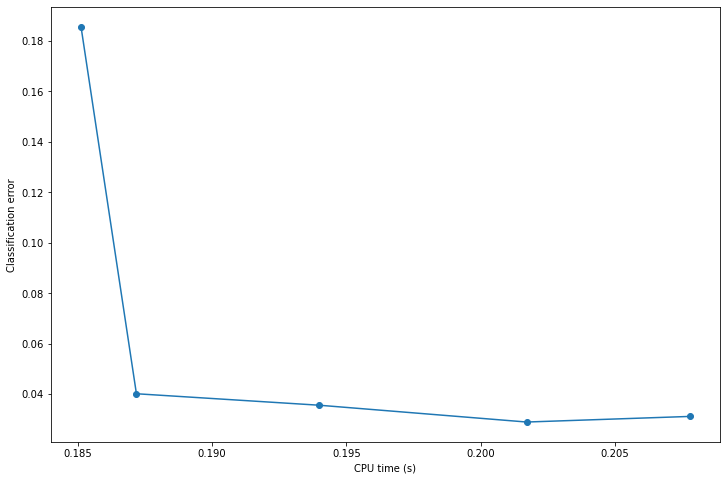

In [48]:
# Calculate the learning curve for the classifier using 10-fold cross-validation
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    extra_final, X_test, y_test, cv=10, scoring='accuracy', return_times=True)

# Plot the classification error over the CPU time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fit_times.mean(axis=1), 1 - np.mean(test_scores, axis=1), 'o-')
ax.set_xlabel('CPU time (s)')
ax.set_ylabel('Classification error')
fig.savefig('cpu_vs_err_extra.png')

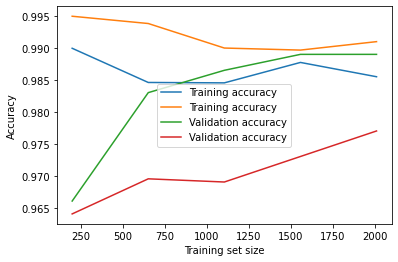

In [49]:
# generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    extra_final, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)

# plot the learning curve
plt.plot(train_sizes, train_scores, label='Training accuracy')
plt.plot(train_sizes, val_scores, label='Validation accuracy')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.savefig('set_size_vs_acc_extra.png')


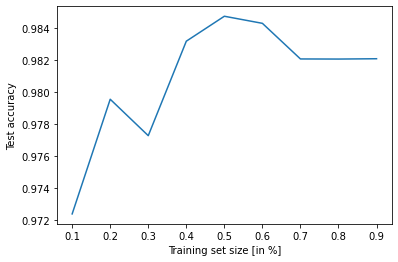

In [50]:
# Create an array of training set sizes
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create an empty list to store the accuracy scores
accuracies = []

# Loop over the training set sizes
for size in sizes:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size)

    # Train a support vector classifier
    extra_fin = ExtraTreesClassifier(max_depth= 100,
                                   min_samples_leaf= 3,
                                   min_samples_split= 12,
                                   n_estimators= 100)
    extra_fin.fit(X_train, y_train)

    # Evaluate the classifier on the test set
    accuracy = extra_fin.score(X_test, y_test)

    # Store the accuracy score
    accuracies.append(accuracy)

# Plot the training set size vs accuracy
plt.plot(sizes, accuracies)
plt.xlabel('Training set size [in %]')
plt.ylabel('Test accuracy')
plt.savefig('set_size_pct_vs_acc_extra.png')
plt.show()

# PART 3.3. HYPERPARAMETERTUNING AND TRAINING AND EVALUATION FOR Ada Boost

In [51]:
param_ada = {
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [52]:
ada = AdaBoostClassifier()
print(np.mean(cross_val_score(ada, X_train, y_train, cv=10)))

grid_ada = GridSearchCV(ada, param_ada, cv=10)
grid_ada.fit(X_train, y_train)

y_pred_ada = grid_ada.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

0.9808339846900163
Accuracy: 0.9843400447427293


In [53]:
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n",grid_ada.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_ada.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_ada.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

 The best score across ALL searched params:
 0.9823271423431471

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'n_estimators': 1000}


In [54]:
ada_final = AdaBoostClassifier(learning_rate = 0.1,n_estimators= 1000)
ada_final.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

In [55]:
scores = cross_val_score(ada_final, X_test, y_test, cv=10)

# Print the cross-validation scores for each fold
print('Cross-validation scores:', scores)

# Calculate the mean cross-validation error
mean_score = np.mean(scores)
print('Mean cross-validation error:', mean_score)

Cross-validation scores: [0.93333333 0.93333333 0.95555556 0.97777778 0.97777778 0.97777778
 0.93333333 1.         1.         0.97727273]
Mean cross-validation error: 0.9666161616161615


In [111]:
y_pred_ada_final = ada_final.predict(X_test)

cm = confusion_matrix(y_test.values, y_pred_ada_final)
cm

array([[ 85,   3],
       [  4, 355]])

In [112]:
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred_ada_final)
print(accuracy)

# Calculate the precision of the model
precision = metrics.precision_score(y_test, y_pred_ada_final)
print(precision)

# Calculate the recall of the model
recall = metrics.recall_score(y_test, y_pred_ada_final)
print(recall)

# Calculate the F1 score of the model
f1_score = metrics.f1_score(y_test, y_pred_ada_final)
print(f1_score)

0.9843400447427293
0.9916201117318436
0.9888579387186629
0.9902370990237098


[Text(0.5, 0.75, 'x[149] <= 0.5\ngini = 0.324\nsamples = 4017\nvalue = [0.203, 0.797]'),
 Text(0.25, 0.25, 'gini = 0.162\nsamples = 629\nvalue = [0.143, 0.014]'),
 Text(0.75, 0.25, 'gini = 0.134\nsamples = 3388\nvalue = [0.061, 0.783]')]

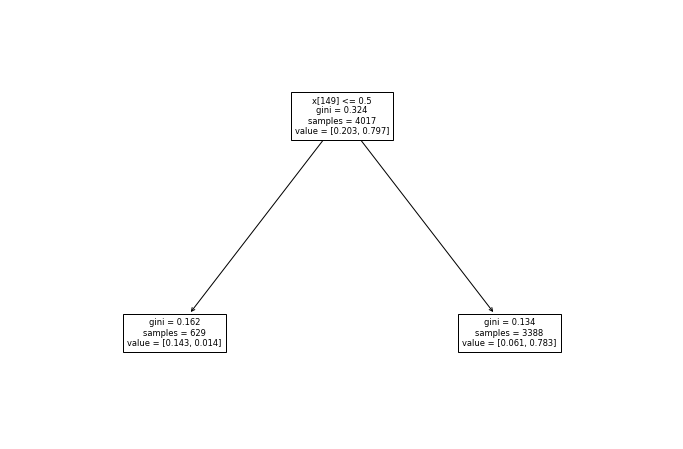

In [57]:
tree = ada_final.estimators_[0]
# Set the maximum depth of the tree to plot
max_depth = 3

# Set the font size for the text in the plot
fontsize = 'small'

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(tree, max_depth=max_depth, fontsize=fontsize, ax=ax)

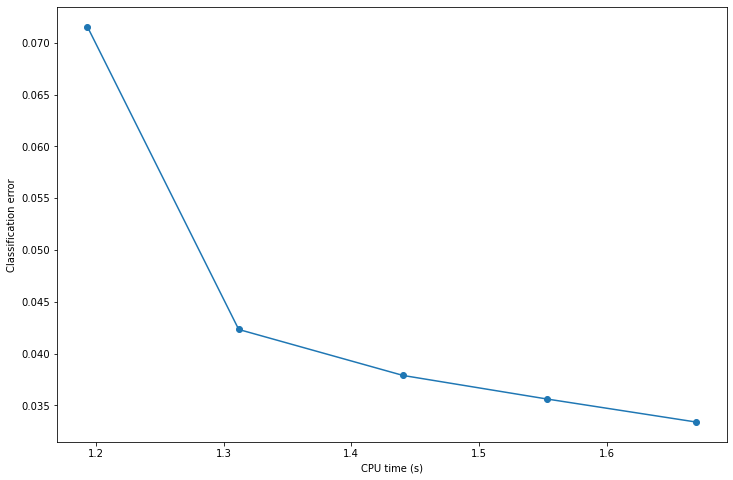

In [58]:
# Calculate the learning curve for the classifier using 10-fold cross-validation
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    ada_final, X_test, y_test, cv=10, scoring='accuracy', return_times=True)

# Plot the classification error over the CPU time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fit_times.mean(axis=1), 1 - np.mean(test_scores, axis=1), 'o-')
ax.set_xlabel('CPU time (s)')
ax.set_ylabel('Classification error')
fig.savefig('cpu_vs_err_ada.png')

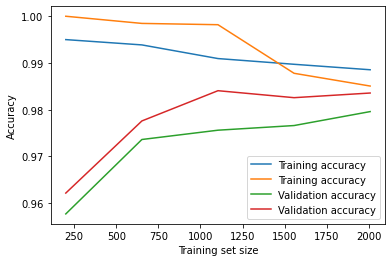

In [59]:
# Training accuracy vs validation accuracy

# generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    ada_final, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)

# plot the learning curve
plt.plot(train_sizes, train_scores, label='Training accuracy')
plt.plot(train_sizes, val_scores, label='Validation accuracy')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.savefig('set_size_vs_acc_ada.png')

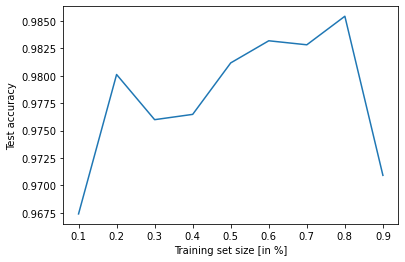

In [60]:
# Create an array of training set sizes
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create an empty list to store the accuracy scores
accuracies = []

# Loop over the training set sizes
for size in sizes:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size)

    # Train a support vector classifier
    ada_fin = AdaBoostClassifier(learning_rate = 0.1,n_estimators= 1000)
    ada_fin.fit(X_train, y_train)

    # Evaluate the classifier on the test set
    accuracy = ada_fin.score(X_test, y_test)

    # Store the accuracy score
    accuracies.append(accuracy)

# Plot the training set size vs accuracy
plt.plot(sizes, accuracies)
plt.xlabel('Training set size [in %]')
plt.ylabel('Test accuracy')
plt.savefig('set_size_pct_vs_acc_ada.png')
plt.show()

In this example, we create an AdaBoost classifier and use the learning_curve function to train the classifier on different subsets of the training data and evaluate its performance on the validation set. We then plot the learning curve to visualize the relationship between the model's performance and the size of the training set.

The learning curve can be a useful tool for diagnosing underfitting and overfitting in your model. If the model's performance on the training set is much higher than on the validation set, it is likely that the model is overfitting the data. On the other hand, if the performance on the training set is much lower than on the validation set, it may indicate that the model is underfitting the data.

# PART 3.4. HYPERPARAMETERTUNING AND TRAINING AND EVALUATION FOR XG Boost

In [61]:
param_xgb = {
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [62]:
xgb = XGBClassifier()
print(np.mean(cross_val_score(xgb, X_train, y_train, cv=10)))

grid_xgb = GridSearchCV(xgb, param_xgb, cv=10)
grid_xgb.fit(X_train, y_train)

y_pred_xgb = grid_xgb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))

0.9915348444808376
Accuracy: 0.9932885906040269


In [63]:
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n",grid_xgb.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_xgb.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_xgb.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

 The best score across ALL searched params:
 0.9910373320430269

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'n_estimators': 200}


In [64]:
xgb_final = XGBClassifier(learning_rate = 0.1,n_estimators = 200)
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [65]:
scores = cross_val_score(xgb_final, X_test, y_test, cv=10)

# Print the cross-validation scores for each fold
print('Cross-validation scores:', scores)

# Calculate the mean cross-validation error
mean_score = np.mean(scores)
print('Mean cross-validation error:', mean_score)

Cross-validation scores: [1.         1.         0.88888889 0.97777778 0.97777778 1.
 1.         0.97727273 0.95454545 0.97727273]
Mean cross-validation error: 0.9753535353535353


In [113]:
y_pred_xgb_final = xgb_final.predict(X_test)

cm = confusion_matrix(y_test.values, y_pred_xgb_final)
cm

array([[ 88,   0],
       [  1, 358]])

In [114]:
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred_xgb_final)
print(accuracy)

# Calculate the precision of the model
precision = metrics.precision_score(y_test, y_pred_xgb_final)
print(precision)

# Calculate the recall of the model
recall = metrics.recall_score(y_test, y_pred_xgb_final)
print(recall)

# Calculate the F1 score of the model
f1_score = metrics.f1_score(y_test, y_pred_xgb_final)
print(f1_score)

0.9977628635346756
1.0
0.9972144846796658
0.99860529986053


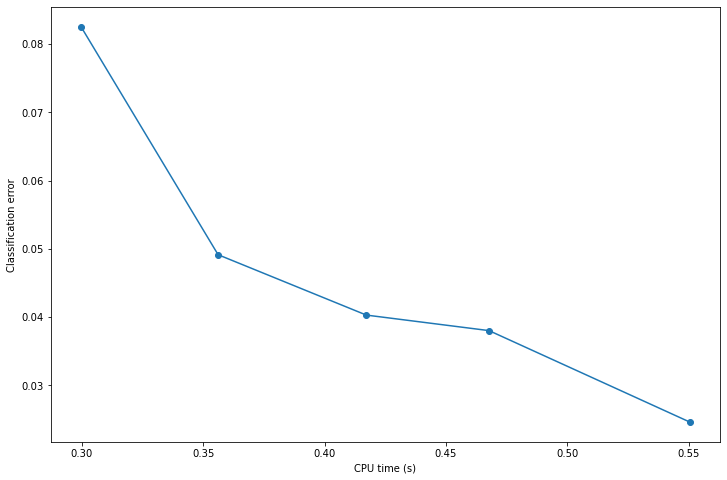

In [67]:
# Calculate the learning curve for the classifier using 10-fold cross-validation
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    xgb_final, X_test, y_test, cv=10, scoring='accuracy', return_times=True)

# Plot the classification error over the CPU time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fit_times.mean(axis=1), 1 - np.mean(test_scores, axis=1), 'o-')
ax.set_xlabel('CPU time (s)')
ax.set_ylabel('Classification error')
fig.savefig('cpu_vs_err_xgb.png')

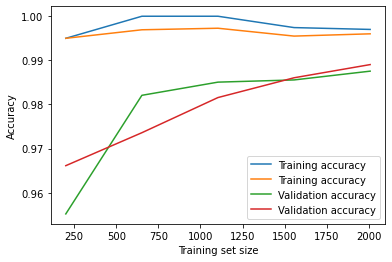

In [68]:
# Training accuracy vs validation accuracy

# generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    xgb_final, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)

# plot the learning curve
plt.plot(train_sizes, train_scores, label='Training accuracy')
plt.plot(train_sizes, val_scores, label='Validation accuracy')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.savefig('set_size_vs_acc_xgb.png')

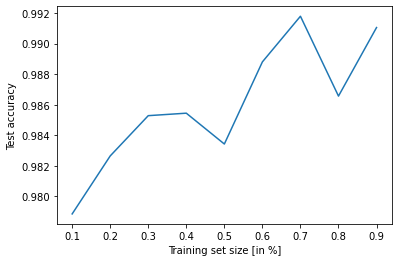

In [69]:
# Create an array of training set sizes
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create an empty list to store the accuracy scores
accuracies = []

# Loop over the training set sizes
for size in sizes:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size)

    # Train a support vector classifier
    xgb_fin = XGBClassifier(learning_rate = 0.1,n_estimators = 200)
    xgb_fin.fit(X_train, y_train)

    # Evaluate the classifier on the test set
    accuracy = xgb_fin.score(X_test, y_test)

    # Store the accuracy score
    accuracies.append(accuracy)

# Plot the training set size vs accuracy
plt.plot(sizes, accuracies)
plt.xlabel('Training set size [in %]')
plt.ylabel('Test accuracy')
plt.savefig('set_size_pct_vs_acc_xgb.png')
plt.show()

# PART 3.5. HYPERPARAMETERTUNING AND TRAINING AND EVALUATION FOR Gradient boost

In [70]:
param_grad = {
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [5, 7, 10]
}

In [71]:
grad = GradientBoostingClassifier()
print(np.mean(cross_val_score(grad, X_train, y_train, cv=10)))

grid_grad = GridSearchCV(grad, param_grad, cv=10)
grid_grad.fit(X_train, y_train)

y_pred_grad = grid_grad.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_grad))

0.9860615873252193
Accuracy: 0.9955257270693513


In [72]:
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n",grid_grad.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_grad.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_grad.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(max_depth=7, n_estimators=1000)

 The best score across ALL searched params:
 0.9942761256063821

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}


In [73]:
grad_final = GradientBoostingClassifier(learning_rate = 0.1,n_estimators = 1000, max_depth = 7)
grad_final.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=1000)

In [74]:
scores = cross_val_score(grad_final, X_test, y_test, cv=10)

# Print the cross-validation scores for each fold
print('Cross-validation scores:', scores)

# Calculate the mean cross-validation error
mean_score = np.mean(scores)
print('Mean cross-validation error:', mean_score)

Cross-validation scores: [1.         0.95555556 0.97777778 0.97777778 0.95555556 0.95555556
 0.95555556 0.93181818 0.93181818 1.        ]
Mean cross-validation error: 0.9641414141414142


In [115]:
y_pred_grad_final = grad_final.predict(X_test)

cm = confusion_matrix(y_test.values, y_pred_grad_final)
cm

array([[ 88,   0],
       [  1, 358]])

In [116]:
# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred_grad_final)
print(accuracy)

# Calculate the precision of the model
precision = metrics.precision_score(y_test, y_pred_grad_final)
print(precision)

# Calculate the recall of the model
recall = metrics.recall_score(y_test, y_pred_grad_final)
print(recall)

# Calculate the F1 score of the model
f1_score = metrics.f1_score(y_test, y_pred_grad_final)
print(f1_score)

0.9977628635346756
1.0
0.9972144846796658
0.99860529986053


[Text(0.47115384615384615, 0.9, 'x[149] <= 0.5\nfriedman_mse = 0.159\nsamples = 4017\nvalue = -0.0'),
 Text(0.25, 0.7, 'x[228] <= 0.5\nfriedman_mse = 0.086\nsamples = 624\nvalue = -0.707'),
 Text(0.15384615384615385, 0.5, 'x[216] <= 0.5\nfriedman_mse = 0.14\nsamples = 351\nvalue = -0.633'),
 Text(0.07692307692307693, 0.3, 'x[209] <= 0.5\nfriedman_mse = 0.07\nsamples = 266\nvalue = -0.726'),
 Text(0.038461538461538464, 0.1, '\n  (...)  \n'),
 Text(0.11538461538461539, 0.1, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.3, 'x[220] <= 0.5\nfriedman_mse = 0.248\nsamples = 85\nvalue = -0.342'),
 Text(0.19230769230769232, 0.1, '\n  (...)  \n'),
 Text(0.2692307692307692, 0.1, '\n  (...)  \n'),
 Text(0.34615384615384615, 0.5, 'x[200] <= 0.5\nfriedman_mse = 0.0\nsamples = 273\nvalue = -0.801'),
 Text(0.3076923076923077, 0.3, 'friedman_mse = -0.0\nsamples = 78\nvalue = -5.028'),
 Text(0.38461538461538464, 0.3, 'friedman_mse = -0.0\nsamples = 195\nvalue = -5.028'),
 Text(0.6923076923076923, 0.7, 

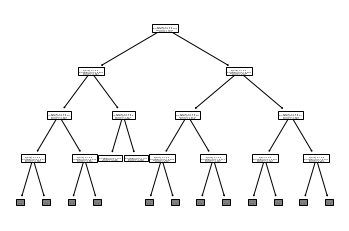

In [76]:
plot_tree(grad_final.estimators_[0, 0], max_depth=3)

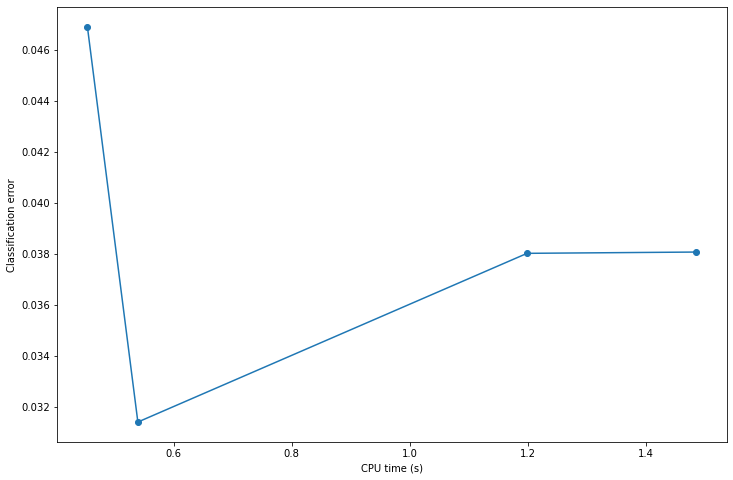

In [77]:
# Calculate the learning curve for the classifier using 10-fold cross-validation
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    grad_final, X_test, y_test, cv=10, scoring='accuracy', return_times=True)

# Plot the classification error over the CPU time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fit_times.mean(axis=1), 1 - np.mean(test_scores, axis=1), 'o-')
ax.set_xlabel('CPU time (s)')
ax.set_ylabel('Classification error')
fig.savefig('cpu_vs_err_grad.png')


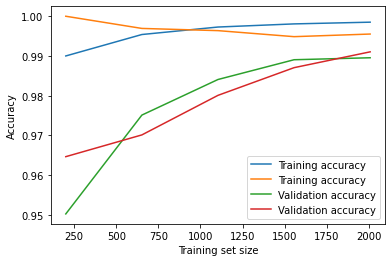

In [78]:
# Training accuracy vs validation accuracy

# generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    grad_final, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)

# plot the learning curve
plt.plot(train_sizes, train_scores, label='Training accuracy')
plt.plot(train_sizes, val_scores, label='Validation accuracy')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.savefig('set_size_vs_acc_grad.png')

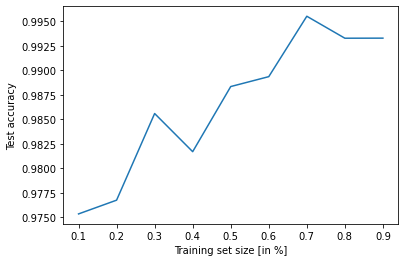

In [101]:
# Create an array of training set sizes
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create an empty list to store the accuracy scores
accuracies = []

# Loop over the training set sizes
for size in sizes:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size)

    # Train a support vector classifier
    grad_fin = XGBClassifier(learning_rate = 0.1,n_estimators = 300)
    grad_fin.fit(X_train, y_train)

    # Evaluate the classifier on the test set
    accuracy = grad_fin.score(X_test, y_test)

    # Store the accuracy score
    accuracies.append(accuracy)

# Plot the training set size vs accuracy
plt.plot(sizes, accuracies)
plt.xlabel('Training set size [in %]')
plt.ylabel('Test accuracy')
plt.savefig('set_size_pct_vs_acc_xgb.png')
plt.show()

# 4. New model approaches: Deep Learning, SVM, etc.

# 4.1 Deep Learning: Hyperparameter tuning

In [80]:
# create a neural network classifier
dn = MLPClassifier()

# specify the hyperparameters to tune
param_dn = {
    'hidden_layer_sizes': [(10,), (20,), (30,)],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

param_dn1 = {
    'hidden_layer_sizes': [(10, 60, 10), (20, 30, 20), 
                           (10, 30, 30, 10), (20, 15, 15, 20), 
                           (10, 30, 20, 10), (20, 20, 15, 20)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'solver': ['sgd'],
    'learning_rate': ['adaptive'],
    'batch_size': [32, 64, 128],
    'activation': ['relu']
}

# use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(dn, param_dn1)
grid_search.fit(X_train, y_train)

# print the best hyperparameters found
print(grid_search.best_params_)

/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'batch_size': 64, 'hidden_layer_sizes': (20, 20, 15, 20), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'sgd'}


In [ ]:
0.7 * 4464 / (2*40)

In [81]:
# Create a neural network with 3 hidden layers, each with 100 neurons
hidden_layer_sizes = (20, 20, 15, 20)

# Use the stochastic gradient descent solver with an inital learning rate of 0.1 and adaptive step size
solver = 'sgd'
learning_rate_init = 0.1
learning_rate= 'adaptive'

# Use a batch size of 128
batch_size = 64

# Use the ReLU activation function
activation = 'relu'

# Activation function for output layer
#out_activation_='sigmoid'

# Create the MLPClassifier object
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver=solver, 
                    learning_rate_init=learning_rate_init, learning_rate = learning_rate,
                    batch_size=batch_size, activation=activation)

# Train the model on the training data
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=(20, 20, 15, 20),
              learning_rate='adaptive', learning_rate_init=0.1, solver='sgd')

In [82]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the predictions
precision = precision_score(y_test, y_pred)

# Calculate the recall of the predictions
recall = recall_score(y_test, y_pred)

# Calculate the f1-score of the predictions
f1 = f1_score(y_test, y_pred)

# Print the results
print('Accuracy: %.5f' % accuracy)
print('Precision: %.5f' % precision)
print('Recall: %.5f' % recall)
print('F1-score: %.5f' % f1)

Accuracy: 0.99329
Precision: 0.99422
Recall: 0.99710
F1-score: 0.99566


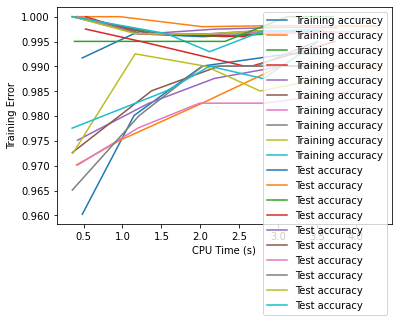

In [83]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(mlp, X_train, y_train, 
                                                                                cv=10, return_times=True)

# Use the fit_times data to plot the CPU time against the training error
plt.plot(fit_times, train_scores, label='Training accuracy')
plt.plot(fit_times, test_scores, label='Test accuracy')
plt.legend()
plt.xlabel('CPU Time (s)')
plt.ylabel('Training Error')
plt.savefig('cpu_vs_err_nn.png')

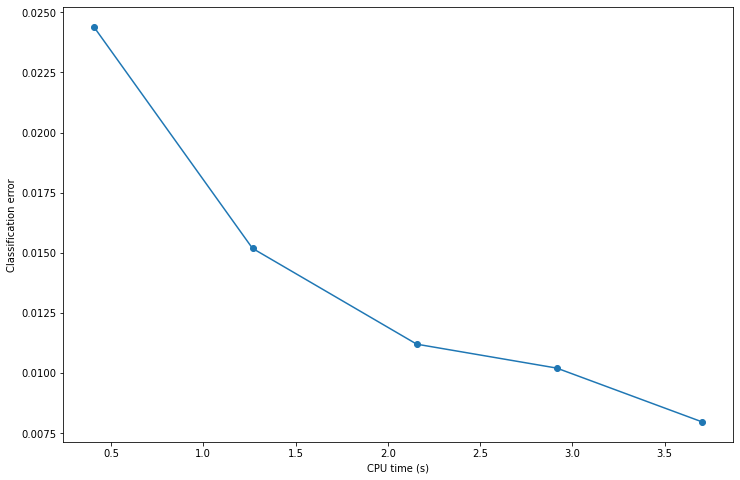

In [84]:
# Plot the classification error over the CPU time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fit_times.mean(axis=1), 1 - np.mean(test_scores, axis=1), 'o-')
ax.set_xlabel('CPU time (s)')
ax.set_ylabel('Classification error')
fig.savefig('cpu_time_vs_err_nn.png')

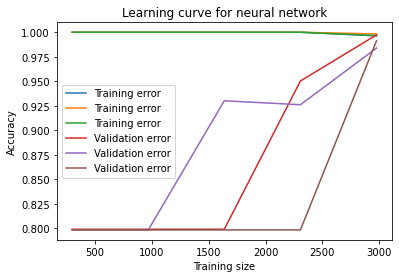

In [85]:
# Use the learning_curve function to plot the learning curve
train_sizes, train_scores, validation_scores = learning_curve(mlp, 
                                                              X, 
                                                              y, 
                                                              cv=3)
# Plot the learning curve
plt.plot(train_sizes, train_scores, label='Training error')
plt.plot(train_sizes, validation_scores, label='Validation error')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Learning curve for neural network')
plt.savefig('train_size_vs_err_nn.png')
plt.legend()
plt.show()

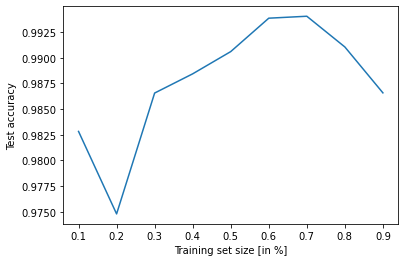

In [86]:
# Create an array of training set sizes
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create an empty list to store the accuracy scores
accuracies = []

# Loop over the training set sizes
for size in sizes:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size)

    # Train a support vector classifier
    mlp_fin = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver=solver, 
                    learning_rate_init=learning_rate_init, learning_rate = learning_rate,
                    batch_size=batch_size, activation=activation)
    mlp_fin.fit(X_train, y_train)

    # Evaluate the classifier on the test set
    accuracy = mlp_fin.score(X_test, y_test)

    # Store the accuracy score
    accuracies.append(accuracy)

# Plot the training set size vs accuracy
plt.plot(sizes, accuracies)
plt.xlabel('Training set size [in %]')
plt.ylabel('Test accuracy')
plt.savefig('set_size_pct_vs_acc_nn.png')
plt.show()

# 4.2 SVC Classifier 

In [87]:
# Create a list of different kernel functions to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create a list of different C values to try
C_values = [0.1, 1.0, 10.0, 100.0]

# Create a list of different gamma values to try
gamma_values = [0.001, 0.01, 0.1, 1.0]

# Create a dictionary of hyperparameters to tune
params = {'kernel': kernels, 'C': C_values, 'gamma': gamma_values}

# Create a grid search object
grid = GridSearchCV(SVC(), params, cv=5)

# Fit the grid search object to the data
grid.fit(X_train, y_train)

# Print the best performing kernel function
print(grid.best_params_)

{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [89]:
svc = SVC(kernel='rbf', C=100.0, gamma = 0.1, probability=True)
svc.fit(X_train, y_train)

SVC(C=100.0, gamma=0.1, probability=True)

In [90]:
# Make predictions on the test set
predictions = svc.predict(X_test)

# Calculate the accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Print the scores
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')

Accuracy: 0.98658
Precision: 0.99176
Recall: 0.99176


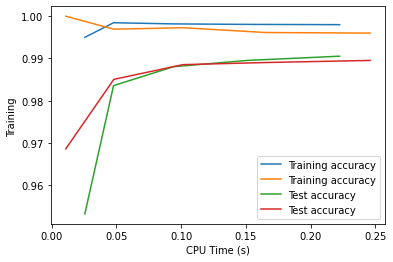

In [91]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(svc, X_train, y_train, 
                                                                                cv=2, return_times=True)

# Use the fit_times data to plot the CPU time against the training error
plt.plot(fit_times, train_scores, label='Training accuracy')
plt.plot(fit_times, test_scores, label='Test accuracy')
plt.legend()
plt.xlabel('CPU Time (s)')
plt.ylabel('Training ')
plt.savefig('cpu_vs_err_svc.png')

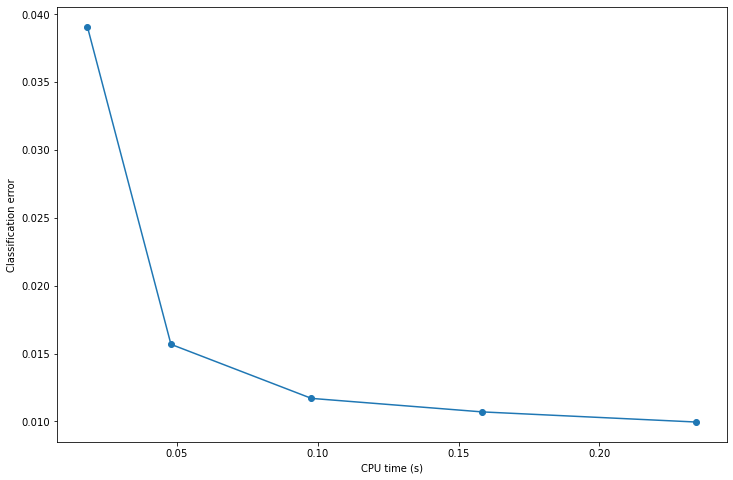

In [92]:
# Plot the classification error over the CPU time
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(fit_times.mean(axis=1), 1 - np.mean(test_scores, axis=1), 'o-')
ax.set_xlabel('CPU time (s)')
ax.set_ylabel('Classification error')
fig.savefig('cpu_time_vs_err_svc.png')

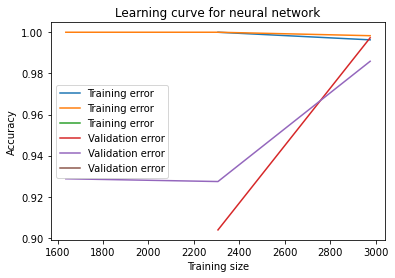

In [93]:
# Use the learning_curve function to plot the learning curve
train_sizes, train_scores, validation_scores = learning_curve(svc, 
                                                              X, 
                                                              y, 
                                                              cv=3)
# Plot the learning curve
plt.plot(train_sizes, train_scores, label='Training error')
plt.plot(train_sizes, validation_scores, label='Validation error')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Learning curve for neural network')
plt.savefig('train_size_vs_err_svc.png')
plt.legend()
plt.show()

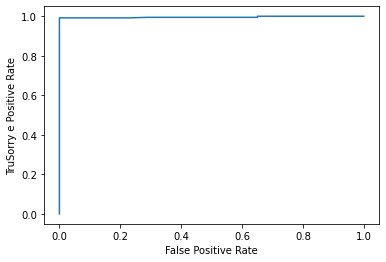

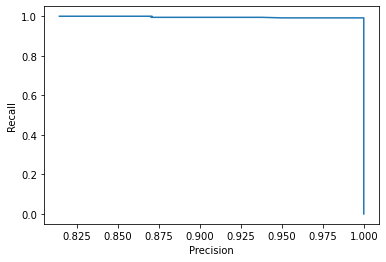

[[ 80   3]
 [  3 361]]


In [94]:
# Compute the predicted probabilities for each class
probs = svc.predict_proba(X_test)

# Compute the true positive rate and false positive rate
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('TruSorry e Positive Rate')
plt.show()

# Compute the precision and recall scores
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1])

# Plot the precision-recall curve
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print(cm)

Text(0, 0.5, 'Accuracy')

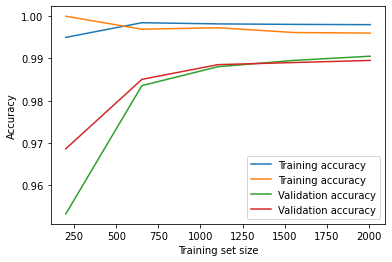

In [95]:
# Training accuracy vs validation accuracy

# generate the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    svc, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)

# plot the learning curve
plt.plot(train_sizes, train_scores, label='Training accuracy')
plt.plot(train_sizes, val_scores, label='Validation accuracy')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Accuracy')

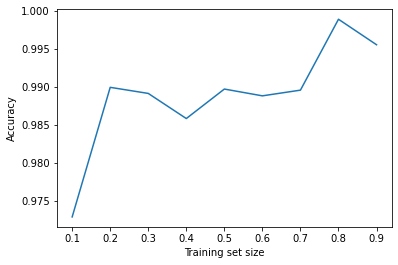

In [96]:
# Create an array of training set sizes
sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create an empty list to store the accuracy scores
accuracies = []

# Loop over the training set sizes
for size in sizes:
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-size)

    # Train a support vector classifier
    svc_fin = SVC(kernel='rbf', C = 10.0, gamma = 0.1)
    svc_fin.fit(X_train, y_train)

    # Evaluate the classifier on the test set
    accuracy = svc_fin.score(X_test, y_test)

    # Store the accuracy score
    accuracies.append(accuracy)

# Plot the training set size vs accuracy
plt.plot(sizes, accuracies)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.savefig('set_size_pct_vs_acc_nn.png')
plt.show()

This code trains an SVC on different training set sizes, and plots the accuracy as a function of the training set size. You can modify this code to experiment with different settings, such as different kernel types or regularization parameters, and see how they affect the accuracy of the SVC.

# 4.3 Logistic regression 

In [97]:
from sklearn import linear_model, model_selection

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Define the logistic regression model
clf = linear_model.LogisticRegression(solver='lbfgs')

# Perform k-fold cross-validation with the parameter grid
kfold = model_selection.KFold(n_splits=10)
grid_search = model_selection.GridSearchCV(clf, param_grid, cv=kfold)
grid_search.fit(X, y)

# Print the best parameter values and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best parameters: {'C': 100, 'penalty': 'l2'}
Best score: 0.969512745658651


/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fit

In [98]:
# Train a logistic regression model
log_reg = linear_model.LogisticRegression(solver='lbfgs', C = 100, penalty = 'l2')
log_reg.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = log_reg.score(X_test, y_test)

# Print the accuracy
print('Accuracy:', accuracy)

Accuracy: 0.9865771812080537


/Users/PaulKandora/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
# Make predictions on the test set
predictions = log_reg.predict(X_test)

# Calculate the accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

# Print the scores
print(f'Accuracy: {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall: {recall:.5f}')

Accuracy: 0.98658
Precision: 0.99140
Recall: 0.99140
